In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
# example of a neutron probe data file
# Potential for duplicate in NP files
# Average multiples use a log?
# file_path = '../Water Balance Test Data/2013 SoilWater_LIRFaccess/date_080213/'
# raw_neutron_probe = pd.read_csv(file_path + 'np080213.csv')
# raw_neutron_probe

In [3]:
# Reading 
file_path = '/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/'
vh20 = pd.read_excel(file_path + 'wrkingLIRF_VolH2O_2013.xlsx', sheet_name= 'Corn', engine = 'openpyxl')
vh20 = vh20.astype({'rep': 'object', 'plot':'object'})
vh20 = vh20.loc[:, ~vh20.columns.str.contains('^Unnamed', na=False)]
print(vh20.shape)
vh20.head()

(336, 46)


,block,rep,plot,trtmplotid,trtm,readby,depth,2013-05-28 00:00:00,2013-06-06 00:00:00,2013-06-10 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,C,1,1,C11,5,TDR,15,8.9,13.300000,14.800000,...,24.200000,12.300000,20.900000,13.400000,8.650000,14.900000,14.150000,25.750000,23.150000,22.850000
1,C,1,1,C11,5,NP,30,NaN,16.536379,18.989338,...,15.664805,14.000051,15.068653,13.787095,12.809120,13.283910,19.899949,19.938924,18.170907,18.620152
2,C,1,1,C11,5,NP,60,NaN,13.789308,14.283243,...,13.908155,13.464984,13.738274,13.089205,12.648874,12.521757,16.400380,16.233876,14.076609,14.590340
3,C,1,1,C11,5,NP,90,NaN,11.760191,11.828730,...,12.136402,11.666141,11.867569,11.805227,11.143601,11.038511,12.341191,13.558929,12.316085,12.195013
4,C,1,1,C11,5,NP,120,NaN,11.630494,12.006358,...,15.398226,14.984755,15.580900,14.481929,14.404853,14.230436,13.798908,15.402415,15.241979,15.000621


In [4]:
# Checking for anything 0 or less
vh20[vh20.loc[0:, 'depth':] <= 0].count().sum()

0

In [5]:
# going from vh20 to SWC
# Need FC from SWC file [need to have input of FC]
swc_from_excel = pd.read_excel(file_path+'SWC_Corn13.xlsx', sheet_name = 'Deficit', engine = 'openpyxl', skiprows = 3)
# Copying sample id information
swc_from_excel['block'] = [str(x)[0] for x in swc_from_excel['Plot'].values]
swc_from_excel['rep'] = [str(x)[1] for x in swc_from_excel['Plot'].values]
swc_from_excel['plot'] = [str(x)[2] for x in swc_from_excel['Plot'].values]
# Dropping empty rows
swc_from_excel = swc_from_excel[swc_from_excel['Depth'] > 0]
swc_from_excel

,Plot,Tmnt,Depth,FC,2013-05-28 00:00:00,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,...,2013-09-05 00:00:00.1,2013-09-06 00:00:00.1,2013-09-17 00:00:00.1,2013-09-25 00:00:00.1,2013-10-21 00:00:00.1,2013-11-06 00:00:00.3,2013-11-06 00:00:00.4,block,rep,plot
0,C12,1.0,15.0,28.0,NaN,15.150000,13.100000,15.450000,2.000000,15.450000,...,13.6375,3.3125,12.2,1.4,-0.6125,5.2625,NaN,C,1,2
1,C22,1.0,15.0,28.0,NaN,18.200000,13.750000,19.650000,4.150000,9.900000,...,7.86401,0.195484,0.635544,0.904926,2.37547,3.14019,NaN,C,2,2
2,C12,1.0,30.0,29.5,NaN,5.219661,1.925007,2.916936,0.106083,6.001370,...,3.06053,2.46734,0.669122,2.50595,3.75858,3.27562,NaN,C,1,2
3,C22,1.0,30.0,25.0,NaN,5.867479,1.853294,3.523355,0.663467,5.982327,...,2.58487,2.0459,0.307094,1.71242,3.30991,3.27746,NaN,C,2,2
4,C12,1.0,60.0,18.0,NaN,3.189524,2.165443,2.456809,1.582830,2.116876,...,1.89942,1.62204,0.254523,1.88352,3.3461,2.57497,NaN,C,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,D24,12.0,120.0,14.0,NaN,5.282598,5.155096,5.324095,5.412601,5.329628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,2,4
332,D11,12.0,150.0,14.0,NaN,5.206093,5.279881,5.265704,5.175120,5.501376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,1,1
333,D24,12.0,150.0,14.0,NaN,5.559181,5.382909,5.267251,5.455819,5.321992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,2,4
334,D11,12.0,200.0,23.0,NaN,8.464671,8.231817,8.430357,8.399823,8.923664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,1,1


In [6]:
# Getting FC from SWC Deficit sheet
fc = swc_from_excel[['block','rep','plot','FC']]
# Changing dtypes for merging with vh20
fc = fc.astype({'block':'str','rep':'str','plot':'str'})
fc['trtmplotid'] = fc['block'] + fc['rep'] + fc['plot']
vh20 = vh20.astype({'block':'str','rep':'str','plot':'str'})
# Sorting indexes to add column (merge and concat not working, resulting in Nan columns)
fc = fc.sort_values(['block','rep','plot']).reset_index()
vh20 = vh20.sort_values(['block','rep','plot']).reset_index()
# vh20_fc = pd.concat([vh20, fc], axis = 1)
# Merge not working, this option is not ideal but works for now
vh20_fc = vh20.copy()
vh20_fc['fc'] = fc['FC']
# Rearranging columns
vh20_fc = vh20_fc[list(vh20_fc.columns[:6]) + ['fc'] + list(vh20_fc.columns[7:len(vh20_fc.columns)-1])]
print(vh20_fc.shape)
vh20_fc

(336, 47)


,index,block,rep,plot,trtmplotid,trtm,fc,depth,2013-05-28 00:00:00,2013-06-06 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,0,C,1,1,C11,5,25.0,15,8.9,13.300000,...,24.200000,12.300000,20.900000,13.400000,8.650000,14.900000,14.150000,25.750000,23.150000,22.850000
1,1,C,1,1,C11,5,22.0,30,NaN,16.536379,...,15.664805,14.000051,15.068653,13.787095,12.809120,13.283910,19.899949,19.938924,18.170907,18.620152
2,2,C,1,1,C11,5,16.5,60,NaN,13.789308,...,13.908155,13.464984,13.738274,13.089205,12.648874,12.521757,16.400380,16.233876,14.076609,14.590340
3,3,C,1,1,C11,5,14.0,90,NaN,11.760191,...,12.136402,11.666141,11.867569,11.805227,11.143601,11.038511,12.341191,13.558929,12.316085,12.195013
4,4,C,1,1,C11,5,17.0,120,NaN,11.630494,...,15.398226,14.984755,15.580900,14.481929,14.404853,14.230436,13.798908,15.402415,15.241979,15.000621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,D,4,6,D46,4,24.0,60,NaN,21.651646,...,20.199802,19.086497,20.683970,19.959611,18.492281,17.704836,23.299404,20.627473,19.052481,22.011952
332,332,D,4,6,D46,4,25.0,90,NaN,20.327744,...,23.122683,22.647010,21.260843,21.635689,20.475576,21.377883,25.469373,24.900347,22.986809,21.478556
333,333,D,4,6,D46,4,21.0,120,NaN,16.016669,...,16.438394,16.238338,16.263033,16.186341,15.398145,15.556885,16.985815,16.408647,15.544951,15.973334
334,334,D,4,6,D46,4,22.0,150,NaN,17.855652,...,21.461479,20.435742,21.163217,20.337909,20.200213,19.728474,19.627100,20.818267,19.464238,19.420192


In [7]:
# SWCCorn13 = FC-Raw
# SWD = FC - SWC

In [8]:
# Calculating SWD
vh20_fc_swd = vh20_fc.copy()
for column in vh20_fc_swd:
    if type(column) is datetime.datetime:
        vh20_fc_swd[column] = vh20_fc_swd['fc'] - vh20_fc_swd[column]

In [9]:
# Checking that FC is correct
fc[fc['trtmplotid'] == 'D46']

,index,block,rep,plot,FC,trtmplotid
329,99,D,4,6,27.0,D46
330,101,D,4,6,27.0,D46
331,103,D,4,6,24.0,D46
332,105,D,4,6,25.0,D46
333,107,D,4,6,21.0,D46
334,109,D,4,6,22.0,D46
335,111,D,4,6,24.0,D46


In [10]:
# Checking that FC is correct
vh20_fc_swd[vh20_fc_swd['trtmplotid'] == 'D46']

,index,block,rep,plot,trtmplotid,trtm,fc,depth,2013-05-28 00:00:00,2013-06-06 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
329,329,D,4,6,D46,4,27.0,15,NaN,17.950000,...,3.650000,11.750000,0.050000,1.250000,14.350000,4.200000,2.600000,5.600000,-0.200000,3.250000
330,330,D,4,6,D46,4,27.0,30,NaN,7.226503,...,1.813510,6.914911,4.033896,6.912283,9.812979,4.229735,0.693300,0.263923,2.285764,2.464842
331,331,D,4,6,D46,4,24.0,60,NaN,2.348354,...,3.800198,4.913503,3.316030,4.040389,5.507719,6.295164,0.700596,3.372527,4.947519,1.988048
332,332,D,4,6,D46,4,25.0,90,NaN,4.672256,...,1.877317,2.352990,3.739157,3.364311,4.524424,3.622117,-0.469373,0.099653,2.013191,3.521444
333,333,D,4,6,D46,4,21.0,120,NaN,4.983331,...,4.561606,4.761662,4.736967,4.813659,5.601855,5.443115,4.014185,4.591353,5.455049,5.026666
334,334,D,4,6,D46,4,22.0,150,NaN,4.144348,...,0.538521,1.564258,0.836783,1.662091,1.799787,2.271526,2.372900,1.181733,2.535762,2.579808
335,335,D,4,6,D46,4,24.0,200,NaN,6.311540,...,0.621633,0.745210,1.222771,1.332364,1.239215,1.635776,2.023808,1.296404,2.533690,3.156226


In [11]:
# Checking that SWD matches SWC Deficit sheet, it does
vh20_fc_swd[vh20_fc_swd['trtmplotid'] == 'C12']

,index,block,rep,plot,trtmplotid,trtm,fc,depth,2013-05-28 00:00:00,2013-06-06 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
7,7,C,1,2,C12,1,28.0,15,NaN,15.150000,...,1.166667,9.050000,1.400000,1.750000,15.700000,2.100000,11.500000,2.800000,-0.750000,-0.050000
8,8,C,1,2,C12,1,29.5,30,NaN,5.219661,...,0.283513,4.404539,0.002692,4.054358,8.246850,0.044988,0.068894,0.225147,2.139350,2.440150
9,9,C,1,2,C12,1,18.0,60,NaN,3.189524,...,1.842697,3.242091,2.120094,2.603640,3.695622,2.728880,1.251748,3.138136,4.121606,3.388946
10,10,C,1,2,C12,1,14.0,90,NaN,1.602468,...,0.854506,1.119634,1.235208,1.180496,1.421385,1.791475,0.058311,1.299933,2.696315,2.262857
11,11,C,1,2,C12,1,14.5,120,NaN,1.171020,...,0.184428,0.612599,0.744660,0.405794,0.648277,0.868844,-1.016092,0.258331,1.485883,1.616960
12,12,C,1,2,C12,1,14.0,150,NaN,1.406109,...,0.750866,1.066099,1.056944,1.116928,1.129915,0.883684,0.169800,0.689886,1.603882,2.165192
13,13,C,1,2,C12,1,15.5,200,NaN,2.674659,...,0.877627,1.174601,1.707612,1.420288,1.648277,1.183649,1.335685,0.153976,1.902906,2.244492


In [12]:
vh20_fc_swd['trtm'].values

array([ 5,  5,  5,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1,  1,  7,  7,  7,
        7,  7,  7,  7,  4,  4,  4,  4,  4,  4,  4, 11, 11, 11, 11, 11, 11,
       11, 10, 10, 10, 10, 10, 10, 10,  7,  7,  7,  7,  7,  7,  7,  1,  1,
        1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,  9,
        9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8, 12, 12, 12, 12,
       12, 12, 12,  2,  2,  2,  2,  2,  2,  2,  6,  6,  6,  6,  6,  6,  6,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  6,  6,  6,
        6,  6,  6,  6,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  3,  3,  3,  3,  3,  3,  3, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  6,
        6,  6,  6,  6,  6,  6,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,
        2,  2,  2,  9,  9

In [13]:
# Checking for anything 0 or less
vh20_fc_swd[vh20_fc_swd.loc[0:, 'fc':] <= 0].count().sum()

547

In [14]:
# looking at smallest values in each column
for column in vh20_fc_swd:
    print(min(vh20_fc_swd[column]))

0
C
1
1
C11
1
10.0
15
12.45
0.9481630756148007
0.6573251008484
0.4990256437473999
-3.3999999999999986
-0.8054233411836016
-1.4972632720014012
-1.1155161937674016
-2.7589245422486
-1.0675149877589014
-0.4068695852879003
0.3478903039363992
0.28400447298609954
-0.7020500548397983
0.7864497476354995
-0.6999999999999993
-1.3999999999999986
0.4092723315312998
-0.46803434518770004
-4.5
-0.08391389945179917
-2.3504807364335
-0.6789912118611987
-0.8486992432964016
-1.1000000000000014
-1.0624028579434999
-4.200000000000003
-1.0500000000000007
-0.03835685601599792
-3.4499999999999993
-0.14245776753320172
-1.1499999999999986
0.24758888184689987
-1.8342731034232997
-0.25
-1.0160920286363009
-2.9849558828259006
-4.399999999999999
-3.1499999999999986


In [15]:
# Matches input from Raw data on WaterBalanceCorn13, minus error in trtm 1, depth 15
vh20_fc_swd_grouped = vh20_fc_swd.groupby(['trtm','depth']).mean()
# Dropping index column
vh20_fc_swd_grouped.drop('index', axis = 1, inplace = True)
vh20_fc_swd_grouped

fc  2013-05-28 00:00:00  2013-06-06 00:00:00  \
trtm depth                                                     
1    15     28.250                19.85            17.950000   
     30     27.625                  NaN             6.697801   
     60     20.750                  NaN             3.586020   
     90     22.250                  NaN             3.342071   
     120    21.125                  NaN             2.426618   
...            ...                  ...                  ...   
12   60     22.750                  NaN             5.242827   
     90     17.575                  NaN             6.524454   
     120    15.500                  NaN             6.223059   
     150    15.250                  NaN             6.115444   
     200    18.500                  NaN             6.151030   

            2013-06-10 00:00:00  2013-06-13 00:00:00  2013-06-14 00:00:00  \
trtm depth                                                                  
1    15               12.833333            17.512500             2.895833   
     30                2.942964             3.733472             0.787414   
     60                3.166570             3.326551             2.233998   
     90                3.258307             3.359941             2.731813   
     120               1.638626             2.227534             2.255447   
...                         ...                  ...                  ...   
12   60                3.023199             3.615218             0.962397   
     90                6.309899             6.083729             6.371213   
     120               6.142705             6.122929             6.257879   
     150               6.065249             5.919078             6.042222   
     200               5.992547             6.295126             6.132344   

            2013-06-20 00:00:00  2013-06-21 00:00:00  2013-06-26 00:00:00  \
trtm depth                                                                  
1    15               10.700000             4.525000            17.637500   
     30                5.833759             1.357275             6.592658   
     60                2.742704             2.054325             2.393397   
     90                3.113368             2.976365             2.638699   
     120               1.470367             1.339388             1.147884   
...                         ...                  ...                  ...   
12   60                1.063133             0.863812             1.768181   
     90                4.961913             5.140976             4.855048   
     120               5.588341             5.582964             5.043037   
     150               6.232262             6.127911             5.898754   
     200               6.453560             6.382736             6.473800   

            2013-06-27 00:00:00  ...  2013-08-22 00:00:00  \
trtm depth                       ...                        
1    15                3.025000  ...             0.891667   
     30                2.276958  ...             0.614268   
     60                1.663444  ...             0.663549   
     90                2.508161  ...             1.081754   
     120               1.401740  ...             1.062509   
...                         ...  ...                  ...   
12   60                1.338272  ...             2.309123   
     90                4.724324  ...             3.518158   
     120               4.913382  ...             3.808050   
     150               5.897642  ...             5.162178   
     200               6.194261  ...             6.317935   

            2013-08-26 00:00:00  2013-08-27 00:00:00  2013-08-29 00:00:00  \
trtm depth                                                                  
1    15               11.350000             1.075000             2.850000   
     30                4.405903             0.246236             3.855933   
     60                2.331964             1.285690             2.326630   


In [16]:
# len(([1.5] + [3]*(len(set(vh20['depth'])) - 1)) * (len(set(vh20['trtm']))))

In [17]:
# The multiplier 1.5 is to multiply the percent SWD by the depth of the layer to find a depth SWD (mm). 
# Another way to write would be SWD/100*150, where dividing by 100 turns the SWD % into a decimal, 
# and 150 (mm) is the layer depth.  In subsequent layers that the layer is 300mm or 30cm deep
multiplier_list = ([1.5] + [3]*(len(set(vh20['depth'])) - 1)) * (len(set(vh20['trtm'])))
vh20_fc_swd_grouped_multiplied = vh20_fc_swd_grouped.copy()
for column in vh20_fc_swd_grouped:
    if column == 'fc':
        continue
    vh20_fc_swd_grouped_multiplied[column] = vh20_fc_swd_grouped_multiplied[column]*(multiplier_list)
#     print(min(vh20_fc_swd_grouped[column]))
# Correctly matches WaterBalance
vh20_fc_swd_grouped_multiplied = vh20_fc_swd_grouped_multiplied.reset_index()
vh20_fc_swd_grouped_multiplied

,trtm,depth,fc,2013-05-28 00:00:00,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,2013-06-21 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,1,15,28.250,29.775,26.925000,19.250000,26.268750,4.343750,16.050000,6.787500,...,1.337500,17.025000,1.612500,4.275000,20.456250,4.968750,18.300000,2.100000,-0.918750,7.893750
1,1,30,27.625,NaN,20.093403,8.828891,11.200415,2.362241,17.501276,4.071825,...,1.842804,13.217708,0.738709,11.567800,23.592027,0.586453,1.906632,2.714779,7.126406,9.420560
2,1,60,20.750,NaN,10.758061,9.499709,9.979654,6.701995,8.228113,6.162974,...,1.990646,6.995891,3.857071,6.979889,9.181591,7.402011,2.007365,7.517844,11.275734,9.826870
3,1,90,22.250,NaN,10.026212,9.774921,10.079823,8.195438,9.340105,8.929096,...,3.245262,4.783651,4.674431,6.153746,7.754614,6.137701,0.921282,5.137267,9.929732,9.832385
4,1,120,21.125,NaN,7.279853,4.915877,6.682602,6.766340,4.411100,4.018163,...,3.187527,4.528677,3.521811,4.989767,5.698253,4.866115,0.763569,5.650552,10.038310,7.724899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,12,60,22.750,NaN,15.728481,9.069598,10.845653,2.887190,3.189398,2.591435,...,6.927368,8.125073,9.399049,10.363513,17.737836,17.814785,5.577165,0.844992,7.304790,3.836112
80,12,90,17.575,NaN,19.573363,18.929696,18.251186,19.113639,14.885740,15.422927,...,10.554473,11.612886,11.650511,12.785403,15.649600,15.414513,16.026480,11.333815,11.313878,10.043863
81,12,120,15.500,NaN,18.669178,18.428116,18.368787,18.773636,16.765024,16.748892,...,11.424150,10.918416,10.942289,11.327540,12.919931,11.507376,12.727541,12.828088,8.270282,7.036025
82,12,150,15.250,NaN,18.346331,18.195747,17.757233,18.126666,18.696785,18.383732,...,15.486533,15.070858,15.349604,15.292831,15.395722,15.759450,15.737576,15.294568,12.027438,11.213877


In [18]:
vh20_fc_swd_grouped_multiplied_90 = vh20_fc_swd_grouped_multiplied[vh20_fc_swd_grouped_multiplied['depth'] < 100]
vh20_fc_swd_grouped_multiplied_90 = vh20_fc_swd_grouped_multiplied_90.dropna(axis = 1)
vh20_fc_swd_grouped_multiplied_90_grouped = vh20_fc_swd_grouped_multiplied_90.groupby(['trtm']).sum()
vh20_fc_swd_grouped_multiplied_90_grouped = vh20_fc_swd_grouped_multiplied_90_grouped.drop(['depth','fc'], axis = 1).reset_index()
print(vh20_fc_swd_grouped_multiplied_90_grouped.shape)
vh20_fc_swd_grouped_multiplied_90_grouped.head()

(12, 38)


,trtm,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,2013-06-21 00:00:00,2013-06-26 00:00:00,2013-06-27 00:00:00,2013-07-01 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,1,67.802676,47.353522,57.528642,21.603424,51.119494,25.951395,61.330512,23.883188,58.159562,...,8.416211,42.022251,10.882711,28.976434,60.984482,19.094916,23.135279,17.469891,27.413122,36.973565
1,2,59.131746,50.434401,57.576996,22.676450,48.353290,22.321211,59.783182,19.119749,59.380985,...,46.688758,73.357591,53.811695,76.823423,94.092515,77.607152,38.184954,22.508861,28.336303,28.122997
2,3,61.944605,43.129062,53.312546,20.389076,47.034404,22.424231,57.451668,23.431627,60.501482,...,21.779747,47.472366,21.791568,35.987396,60.573163,29.570403,20.072962,12.157679,24.599044,26.012922
3,4,67.621410,45.058667,55.022935,18.677376,45.426113,21.874031,54.750530,25.230473,61.613441,...,26.884969,62.979043,36.948953,52.617878,78.248858,54.849403,19.229308,16.802866,20.236027,21.080040
4,5,80.534839,61.010440,68.964594,33.211547,57.974648,36.700877,66.172144,35.790404,67.128035,...,39.675468,67.391004,46.373231,65.963586,86.773567,72.194109,29.600881,12.488575,19.440488,21.739409


In [19]:
print(len(vh20_fc_swd_grouped_multiplied.columns))
print(len(vh20_fc_swd_grouped_multiplied_90.columns))

42
40


In [20]:
# Dates with NAs
list(set(vh20_fc_swd_grouped_multiplied.columns) - set(vh20_fc_swd_grouped_multiplied_90.columns))

[datetime.datetime(2013, 5, 28, 0, 0), datetime.datetime(2013, 7, 17, 0, 0)]

In [21]:
# Calculating Measured SWD - RZ
# if RZD <= 450:
#   swd_rz = SWD 15cm + (RZD - 150)/300*SWD 30cm
# else:
# Measured swd_rz = 0

In [22]:
plotting_measured_swd = pd.melt(vh20_fc_swd_grouped_multiplied_90_grouped, id_vars = 'trtm')
plotting_measured_swd['variable'] = [(x - datetime.datetime(2013,1,1)).days if type(x) is pd.Timestamp else x for x in plotting_measured_swd['variable']]
plotting_measured_swd = plotting_measured_swd.rename(columns = {'variable':'Days','value':'Measured SWD'})

In [23]:
# Values match
plotting_measured_swd[plotting_measured_swd['trtm'] == 1]

,trtm,Days,Measured SWD
0,1,156,67.802676
12,1,160,47.353522
24,1,163,57.528642
36,1,164,21.603424
48,1,170,51.119494
60,1,171,25.951395
72,1,176,61.330512
84,1,177,23.883188
96,1,181,58.159562
108,1,182,24.835978


In [24]:
# Verifying data
waterbalancecorn13_C1 = pd.read_excel(file_path + 'WaterBalance Corn13.xlsx', sheet_name= 'C1 100100', engine = 'openpyxl', skiprows=2, index_col=0)
waterbalancecorn13_C1

,Unnamed: 1,2012-05-13 00:00:00,2012-05-14 00:00:00,2012-05-15 00:00:00,2012-05-16 00:00:00,2012-05-17 00:00:00,2012-05-18 00:00:00,2012-05-19 00:00:00,2012-05-20 00:00:00,2012-05-21 00:00:00,...,Unnamed: 2068,Unnamed: 2069,Unnamed: 2070,Unnamed: 2071,Unnamed: 2072,Unnamed: 2073,Unnamed: 2074,Unnamed: 2075,Unnamed: 2076,Unnamed: 2077
Date,,,,,,,,,,,,,,,,,,,,,
DOY,NaN,133.0,134,135.0,136.0,137.0,138.0,139.0,140.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage of Growth,NaN,NaN,Planting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Root Zone Depth,mm,80.0,80,80.0,80.0,80.0,80.0,80.0,80.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canopy Cover,%,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DP,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delDP,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kcb (SWD),NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
waterbalance_days_swd = pd.DataFrame({'Days' : waterbalancecorn13_C1.loc['DOY'][1:], 'Measured SWD' : waterbalancecorn13_C1.loc['Meas. SWD - 1050 mm'][1:]})
waterbalance_days_swd = waterbalance_days_swd[waterbalance_days_swd['Measured SWD'] > 0].reset_index().drop('index', axis = 1)
waterbalance_days_swd

,Days,Measured SWD
0,157,59.5852
1,161,47.3535
2,163,57.5286
3,165,21.6034
4,170,51.1195
5,172,25.9514
6,176,61.3305
7,178,23.8457
8,181,58.1596
9,183,24.836


<AxesSubplot:xlabel='Days', ylabel='Measured SWD'>

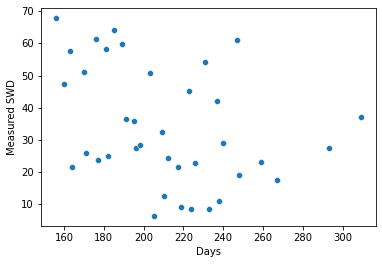

In [26]:
sns.scatterplot(y = 'Measured SWD', x = 'Days', data = plotting_measured_swd[plotting_measured_swd['trtm'] == 1])

<AxesSubplot:xlabel='Days', ylabel='Measured SWD'>

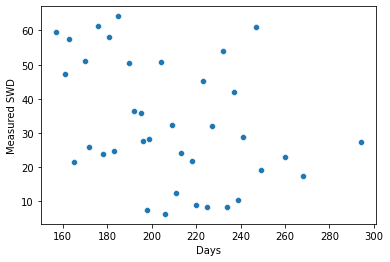

In [27]:
sns.scatterplot(y = 'Measured SWD', x = 'Days', data = waterbalance_days_swd)

In [28]:
# Days not plotted in Excel
# Irrigate on monday's SWB on Monday morning, 
# if irrigation or precip, before irrigation on same day, move to day before
# differences
# subtract one day from days with irrigation or precip, larger than 10mm in one day
print(len(plotting_measured_swd[plotting_measured_swd['trtm'] == 1]))
print(len(waterbalance_days_swd))
print(sorted(list(set(plotting_measured_swd['Days'].astype('str')) - set(waterbalance_days_swd['Days'].astype('int').astype('str').values))))
print(sorted(list(set(waterbalance_days_swd['Days'].astype('int').astype('str').values) - set(plotting_measured_swd['Days'].astype('str')))))

37
37
['156', '160', '164', '171', '177', '182', '189', '191', '203', '205', '210', '212', '217', '219', '224', '226', '231', '233', '238', '240', '248', '259', '267', '293', '309']
['157', '161', '165', '172', '178', '183', '190', '192', '199', '204', '206', '211', '213', '218', '220', '225', '227', '232', '234', '239', '241', '249', '260', '268', '294']


In [29]:
difference_days = []
difference_swd = []
for i in range(len(waterbalance_days_swd)):
    difference_days.append(waterbalance_days_swd['Days'].values[i] - plotting_measured_swd[plotting_measured_swd['trtm'] == 1]['Days'].values[i])
    difference_swd.append(waterbalance_days_swd['Measured SWD'].values[i] - plotting_measured_swd[plotting_measured_swd['trtm'] == 1]['Measured SWD'].values[i])
print(difference_days)
print(difference_swd)

[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0, 0.0, -4.0, -1.0, -3, -1.0, -1.0, -4, -1.0, -3, -1.0, -1.0, -4.0, -1.0, -3.0, -1.0, -1.0, -6.0, -1.0, -10.0, -7.0, -25.0, -15.0]
[-8.217504654878297, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03750000000000142, 0.0, 0.0, 0.0, -9.356250000000003, 0.0, 0.0, 0.0, -20.997658747959527, -22.31931946911518, 44.373108739082774, -26.033943941863956, 19.876635395463754, -11.798781023392348, 2.621513229698099, 12.675440325491024, -36.324884643678374, 36.970201077751575, -14.585968736102993, -21.992622355915806, 45.68241994714654, -33.60603981788344, 31.13954027360123, -18.58122323727106, -32.23304822407026, 41.88956656560059, -4.040363465495851, 5.665388021418231, -9.943231096024725, -9.560442623141704]


In [30]:
# Precip from CoAgMet, redundant precip guages
# Check accuracy of different guages
# Run automatically on daily basis, at least everyday prior to irrigation, irrigating twice per week
# More commenting the better, new postdoc or tech will be working on this
# Pull precip from T200B_T200B_5.dat (I got it from a different file)
# GLY04 Greeley CoAgMet station on site at LIRF
# Errors in raw data (missing, filter out irrigation events), replace with nearby station
# 2013_H60_QAQC.csv for older data, GLY04_H60.dat is raw data (U:\PrevProject 12-16\DATA\DataLogger\Archive\GLY04\2013)

In [31]:
# Replacing quotes in file
# Read in the file
with open(file_path + 'GLY04_H60.dat', 'r') as file :
    filedata = file.read()

# Replace the target string
filedata = filedata.replace('"', '')

# Write the file out again
with open(file_path+'GLY04_H60_no_commas.dat', 'w') as file:
    file.write(filedata)

In [32]:
# Reading in data, skipping first row
coagmet = pd.read_csv(file_path+'GLY04_H60_no_commas.dat', skiprows=1, index_col=0)
# Storing units in list
coagmet_units = coagmet.loc['TS']
# Storing aggregation information in list
coagmet_agg = coagmet.iloc[1]
# Dropping rows that do not contain coagment data
coagmet.drop(['TS'], inplace = True)
print(coagmet.shape)
coagmet = coagmet[coagmet.index.notnull()]
print(coagmet.shape)
# Converting index to datetime format
coagmet.index = pd.to_datetime(coagmet.index)
coagmet['Date'] = coagmet.index
coagmet = coagmet.reset_index()
coagmet.head()

(8062, 18)
(8061, 18)


,TIMESTAMP,RECORD,AirTemp_Avg,RH_Avg,Vap_Press_Avg,HrlySolRad_Avg,WindSpeed,WindDir,WindDir_STDD,Rain_Tot,SoilTemp_5cm_Avg,SoilTemp_15cm_Avg,HWG_speed,HWG_time,HWG_Dir,BaPress_Avg,AVPT_Avg,SVPT_Avg,DOY,Date
0,2013-01-30 03:00:00,26899,-12.38,0.814,0.193,0.004,0.15,199.3,26.31,0,-0.484,-0.18,1.325,120,241.7,85.30626,0.192,0.236,30,2013-01-30 03:00:00
1,2013-01-30 04:00:00,26900,-12.4,0.835,0.197,0.002,0.955,213.5,21.71,0,-0.533,-0.177,2.375,208,209.5,85.28504,0.197,0.236,30,2013-01-30 04:00:00
2,2013-01-30 05:00:00,26901,-13.15,0.864,0.192,0.001,0.943,104.1,23.11,0,-0.595,-0.17,2.675,241,144.5,85.24654,0.191,0.222,30,2013-01-30 05:00:00
3,2013-01-30 06:00:00,26902,-13.88,0.865,0.182,0.004,1.389,76.7,33.85,0,-0.664,-0.168,2.525,307,13.93,85.20575,0.181,0.209,30,2013-01-30 06:00:00
4,2013-01-30 07:00:00,26903,-13.43,0.871,0.19,0.014,1.472,102.2,19.67,0,-0.738,-0.17,2.675,415,128.8,85.15042,0.189,0.217,30,2013-01-30 07:00:00


In [33]:
coagmet[coagmet['Date'] > datetime.datetime(2013,6,4)]

,TIMESTAMP,RECORD,AirTemp_Avg,RH_Avg,Vap_Press_Avg,HrlySolRad_Avg,WindSpeed,WindDir,WindDir_STDD,Rain_Tot,SoilTemp_5cm_Avg,SoilTemp_15cm_Avg,HWG_speed,HWG_time,HWG_Dir,BaPress_Avg,AVPT_Avg,SVPT_Avg,DOY,Date
2998,2013-06-04 01:00:00,29897,14.2,0.645,1.044,0,3.627,345.4,21.11,0,15.73,15.8,5.075,12,347,85.38727,1.045,1.62,155,2013-06-04 01:00:00
2999,2013-06-04 02:00:00,29898,13.85,0.672,1.063,0,3.486,3.976,16.72,0,15.47,15.62,5.15,71,1.439,85.43011,1.064,1.584,155,2013-06-04 02:00:00
3000,2013-06-04 03:00:00,29899,13.07,0.682,1.026,0,4.321,2.333,27.48,0,15.24,15.45,7.4,165,9.4,85.48427,1.027,1.505,155,2013-06-04 03:00:00
3001,2013-06-04 04:00:00,29900,11.27,0.695,0.928,0,3.876,4.517,17.84,0,15,15.28,6.65,182,8.11,85.56964,0.928,1.336,155,2013-06-04 04:00:00
3002,2013-06-04 05:00:00,29901,10.01,0.777,0.954,0.701,1.966,329.9,18.04,0,14.76,15.11,3.575,246,0.048,85.67742,0.955,1.23,155,2013-06-04 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,2013-12-31 19:00:00,34955,4.613,0.466,0.394,0.007,2.405,156.4,19.6,0,-0.265,0.222,6.725,1100,182.3,85.3863,0.395,0.85,365,2013-12-31 19:00:00
8057,2013-12-31 20:00:00,34956,3.099,0.528,0.402,0.005,0.799,74.11,29.93,0,-0.254,0.236,2.675,1198,143.4,85.38851,0.402,0.764,365,2013-12-31 20:00:00
8058,2013-12-31 21:00:00,34957,4.194,0.503,0.412,0,1.427,110.4,22.79,0,-0.248,0.238,4.175,1203,136.6,85.35978,0.412,0.827,365,2013-12-31 21:00:00
8059,2013-12-31 22:00:00,34958,3.385,0.535,0.416,0.001,2.022,203.4,18.28,0,-0.244,0.244,4.475,1314,213.9,85.32092,0.416,0.779,365,2013-12-31 22:00:00


In [34]:
# Subsetting into new dataframe
coagmet_rain = coagmet[['Date','Rain_Tot']]
# Changing to float, they are objects
coagmet_rain['Rain_Tot'] = coagmet_rain['Rain_Tot'].astype('float64')
# Summing rain by days
coagmet_rain = coagmet_rain.groupby(pd.Grouper(key='Date', axis=0, freq='D')).sum()
# Getting DOY
coagmet_rain['DOY'] = [(x - datetime.datetime(coagmet_rain.index[0].year, 1, 1)).days for x in coagmet_rain.index]

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
# Min and max of SWD
day_min = 133
day_max = plotting_measured_swd['Days'].max()
print(day_min, day_max)
# Subsetting to just days when we have SWD
coagmet_rain = coagmet_rain[(coagmet_rain['DOY'] >= day_min) & (coagmet_rain['DOY'] <= day_max)]
# Removing zeros
coagmet_rain = coagmet_rain[coagmet_rain['Rain_Tot'] > 0]
coagmet_rain.head(n = 20)

133 309


,Rain_Tot,DOY
Date,,
2013-05-14,1.270,133
2013-05-19,0.254,138
2013-05-20,4.318,139
2013-05-21,1.016,140
2013-05-22,1.016,141
2013-05-28,2.032,147
2013-05-29,7.874,148
2013-06-04,6.096,154
2013-06-20,0.254,170


In [36]:
plotting_measured_swd

,trtm,Days,Measured SWD
0,1,156,67.802676
1,2,156,59.131746
2,3,156,61.944605
3,4,156,67.621410
4,5,156,80.534839
...,...,...,...
439,8,309,17.847756
440,9,309,21.414656
441,10,309,16.383842
442,11,309,22.849573


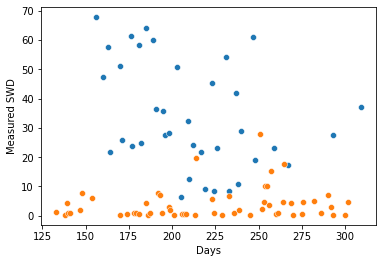

In [37]:
ax = sns.scatterplot(y = 'Measured SWD', x = 'Days', data = plotting_measured_swd[plotting_measured_swd['trtm'] == 1])
ax = sns.scatterplot(y = 'Rain_Tot', x = 'DOY', data = coagmet_rain)

In [38]:
# Econtrol and Wcontrol, east and west (C and D are east control)
# FlwrBDR1 = flow meters
# Irrigation
# U:\PrevProject 12-16\Water Balance\2013\IrrAppl 13.csv
# Econtrol -> IrrAppl -> WaterBalance
# U:\PrevProject 12-16\DATA\DataLogger\Archive\IrrSumm\2013*.*
# Root Zone Depth -> WaterBalance Raw Data as a function of days after planting
# Light and dark lines converge at RAW top

In [39]:
irrigation = pd.read_csv(file_path+'econtrol_IrrSumm.dat', skiprows=1)
irrigation.drop('RECORD', axis = 1, inplace = True)
irrigation.drop([0,1], inplace = True)
irrigation = irrigation.reset_index(drop = True)
irrigation

,TIMESTAMP,CornBDR1,Corn5050,Corn6540,Corn6580,Corn8050,Corn8065,Corn100100,Corn10050,Corn8080,...,amnt(6),amnt(7),amnt(8),amnt(9),amnt(10),amnt(11),amnt(12),amnt(13),amnt(14),Rain_E
0,2013-05-20 08:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-05-20 09:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-05-20 10:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-05-20 11:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-20 12:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,2013-12-06 22:00:00,0,0,0,0,0,0,0,0,0,...,0.126,0.189,0.063,0.126,0.063,0.126,0.126,0.189,0.189,0
4815,2013-12-06 23:00:00,0,0,0,0,0,0,0,0,0,...,0.126,0.189,0.063,0.126,0.063,0.126,0.126,0.189,0.189,0
4816,2013-12-07 00:00:00,0,0,0,0,0,0,0,0,0,...,0.126,0.189,0.063,0.126,0.063,0.126,0.126,0.189,0.189,0
4817,2013-12-07 01:00:00,0,0,0,0,0,0,0,0,0,...,0.126,0.189,0.063,0.126,0.063,0.126,0.126,0.189,0.189,0


In [40]:
irrigation.columns

Index(['TIMESTAMP', 'CornBDR1', 'Corn5050', 'Corn6540', 'Corn6580', 'Corn8050',
       'Corn8065', 'Corn100100', 'Corn10050', 'Corn8080', 'Corn8040',
       'Corn6565', 'Corn6550', 'Corn4040', 'CornBDR2', '1null', '2null',
       'corn_B1', 'corn_5050', 'corn_6540', 'corn_6580', 'corn_8050',
       'corn_8065', 'corn_100100', 'corn_10050', 'corn_8080', 'corn_8040',
       'corn_6565', 'corn_6550', 'corn_4040', 'corn_B2', 'METER(1)',
       'METER(2)', 'METER(3)', 'METER(4)', 'METER(5)', 'METER(6)', 'METER(7)',
       'METER(8)', 'METER(9)', 'METER(10)', 'METER(11)', 'METER(12)',
       'METER(13)', 'METER(14)', 'METERo(1)', 'METERo(2)', 'METERo(3)',
       'METERo(4)', 'METERo(5)', 'METERo(6)', 'METERo(7)', 'METERo(8)',
       'METERo(9)', 'METERo(10)', 'METERo(11)', 'METERo(12)', 'METERo(13)',
       'METERo(14)', 'amnt(1)', 'amnt(2)', 'amnt(3)', 'amnt(4)', 'amnt(5)',
       'amnt(6)', 'amnt(7)', 'amnt(8)', 'amnt(9)', 'amnt(10)', 'amnt(11)',
       'amnt(12)', 'amnt(13)', 'amnt(14)', 

In [41]:
# Renaming columns to treatments
columns = {'Corn5050':'11','Corn6540':'10','Corn6580':'7','Corn8050':'5','Corn8065':'4','Corn100100':'1',
          'Corn10050':'2','Corn8080':'3','Corn8040':'6','Corn6565':'8','Corn6550':'9','Corn4040':'12'}
irrigation = irrigation.rename(columns=columns)
irrigation = irrigation[['TIMESTAMP'] + list(columns.values())]
# Changing to approritate data types
for i in columns.values():
    irrigation[i] = irrigation[i].astype('float64')
irrigation['TIMESTAMP'] = pd.to_datetime(irrigation['TIMESTAMP'])

In [42]:
# Summing irrigation by days
irrigation_days = irrigation.groupby(pd.Grouper(key='TIMESTAMP', axis=0, freq='D')).sum()/10/1570*1000
# Getting DOY
irrigation_days['DOY'] = [(x - datetime.datetime(2013, 1, 1)).days + 1 for x in irrigation_days.index]

In [43]:
irrigation_days[(irrigation_days.index > datetime.datetime(2013,6,4)) & (irrigation_days.index < datetime.datetime(2013,6,6))]

,11,10,7,5,4,1,2,3,6,8,9,12,DOY
TIMESTAMP,,,,,,,,,,,,,
2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156


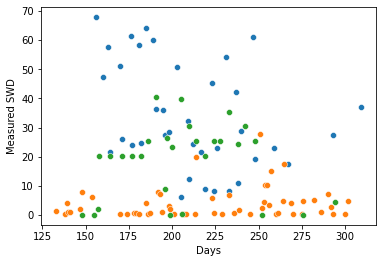

In [44]:
treatment = '1'
ax = sns.scatterplot(y = 'Measured SWD', x = 'Days', data = plotting_measured_swd[plotting_measured_swd['trtm'] == int(treatment)])
ax = sns.scatterplot(y = 'Rain_Tot', x = 'DOY', data = coagmet_rain)
ax = sns.scatterplot(y = treatment, x = 'DOY', data = irrigation_days[irrigation_days[treatment] > 0 ])

In [45]:
irrigation_days[irrigation_days[treatment] > 0]

,11,10,7,5,4,1,2,3,6,8,9,12,DOY
TIMESTAMP,,,,,,,,,,,,,
2013-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.063694,0.000000,0.127389,0.000000,0.000000,0.000000,0.000000,148
2013-06-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.063694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155
2013-06-06,2.547771,2.802548,2.038217,2.292994,2.547771,2.038217,2.292994,1.974522,0.000000,1.847134,1.847134,1.910828,157
2013-06-07,22.229299,22.292994,20.191083,25.414013,20.254777,20.254777,20.254777,20.254777,17.197452,21.974522,22.101911,21.082803,158
2013-06-13,21.783439,21.910828,20.254777,20.318471,20.254777,20.318471,20.318471,20.191083,20.254777,21.783439,21.719745,20.891720,164
2013-06-20,20.254777,20.382166,20.191083,20.318471,20.254777,20.254777,20.318471,20.254777,20.191083,20.254777,20.254777,20.382166,171
2013-06-26,0.000000,12.292994,12.229299,15.222930,15.222930,20.191083,20.254777,15.222930,15.222930,12.165605,12.229299,0.000000,177
2013-07-01,0.000000,12.292994,12.165605,15.286624,15.350318,20.254777,20.382166,15.222930,15.222930,12.229299,12.229299,12.229299,182
2013-07-05,12.165605,16.305732,16.687898,20.318471,20.764331,25.414013,25.414013,20.700637,20.191083,16.687898,16.242038,10.191083,186


In [46]:
# irrigation[(irrigation['TIMESTAMP'] >= datetime.datetime(2013, 7, 10)) & (irrigation['TIMESTAMP'] <= datetime.datetime(2013, 7, 11))]

In [47]:
# Red Avail Water (RZ)
# FC_RZ * TAW_FC * RAW_TAW
# FC_RZ = FC_150*150+(IF(RZD<450,FC_150*(RZD-150),IF(RZD>750,FC_150-450*300+FC_450-750*300+FC_750-1050*(RZD-750),FC_150-450*300+FC_450-750*(RZD-450))))
# FC_150 = 28.3%
# FC_150-450 = 27.6%
# FC_450-750 = 20.8%
# FC_750-1050 = 22.3%
# TAW_FC = Tot Avail Water (%FC) = 50%
# RAW_TAW = Red Available Water = 50%

In [48]:
rzd = pd.DataFrame(waterbalancecorn13_C1.loc['Root Zone Depth'][1:])
rzd = rzd[rzd['Root Zone Depth'] > 0]
rzd.index = pd.to_datetime(rzd.index)
rzd.index = [(x - datetime.datetime(rzd.index[0].year, 1, 1)).days for x in rzd.index]
rzd

,Root Zone Depth
133,80
134,80
135,80
136,80
137,80
...,...
301,1050
302,1050
303,1050
304,1050


In [49]:
fc_rz_treatments = pd.read_csv(file_path + 'fc_treatments.csv', index_col=0)
fc_rz_treatments

,15,30,60,90,120,150,200
Treatment,,,,,,,
1,28.3,27.6,20.8,22.3,21.1,18.0,19.4
2,27.3,25.4,24.8,16.3,14.9,16.2,21.0
3,26.8,26.0,24.8,19.6,16.3,17.2,18.0
4,27.5,27.9,22.4,17.5,16.4,21.0,22.0
5,26.5,26.4,22.6,21.0,17.0,16.2,20.4
6,27.6,24.6,19.5,15.6,15.5,16.5,19.6
7,26.8,26.4,23.3,19.9,14.3,16.8,19.6
8,26.1,23.9,18.8,14.9,15.9,15.7,18.8
9,26.0,22.9,22.5,16.0,16.7,15.3,20.6


In [50]:
rzd

,Root Zone Depth
133,80
134,80
135,80
136,80
137,80
...,...
301,1050
302,1050
303,1050
304,1050


In [51]:
# Defining constants, using variables for treatment 1
treatments = list(range(1,13))
taw_fc = 0.5
raw_taw = 0.5
fc_rz_dfs = []
for h in treatments:
    fc_rz = []
    fc_150 = fc_rz_treatments.loc[h,'15']/100
    fc_150_450 = fc_rz_treatments.loc[h,'30']/100
    fc_450_750 = fc_rz_treatments.loc[h,'60']/100
    fc_750_1050 = fc_rz_treatments.loc[h,'90']/100
    for i in rzd['Root Zone Depth']:
        if i < 450:
            fc_rz.append(fc_150*150+(fc_150_450*(i-150)))
        elif i > 750:
            fc_rz.append(fc_150*150+fc_150_450*300+fc_450_750*300+fc_750_1050*(i-750))
        else:
            fc_rz.append(fc_150*150+fc_150_450*300+fc_450_750*(i-450))

    fc_rz_df = rzd.copy()
    fc_rz_df['FC RZ'] = fc_rz
    fc_rz_df['RAW RZ'] = fc_rz_df['FC RZ']*taw_fc*raw_taw
    fc_rz_df['DOY'] = fc_rz_df.index
    fc_rz_df['Treatment'] = h
    fc_rz_dfs.append(fc_rz_df)
fc_rz_dfs_all = pd.concat(fc_rz_dfs)

In [52]:
fc_rz_dfs_all

,Root Zone Depth,FC RZ,RAW RZ,DOY,Treatment
133,80,23.13,5.7825,133,1
134,80,23.13,5.7825,134,1
135,80,23.13,5.7825,135,1
136,80,23.13,5.7825,136,1
137,80,23.13,5.7825,137,1
...,...,...,...,...,...
301,1050,235.80,58.9500,301,12
302,1050,235.80,58.9500,302,12
303,1050,235.80,58.9500,303,12
304,1050,235.80,58.9500,304,12


Text(0, 0.5, 'Water (mm)')

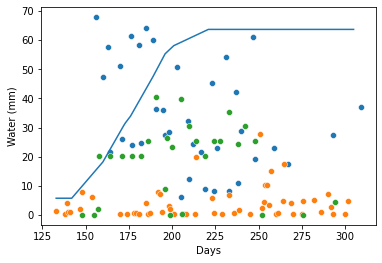

In [53]:
fig, ax = plt.subplots()
treatment = '1'

swd = sns.scatterplot(y = 'Measured SWD', x = 'Days', data = plotting_measured_swd[plotting_measured_swd['trtm'] == int(treatment)], 
                      ax = ax, legend = 'full')
rain = sns.scatterplot(y = 'Rain_Tot', x = 'DOY', data = coagmet_rain, ax = ax)
irr = sns.scatterplot(y = treatment, x = 'DOY', data = irrigation_days[irrigation_days[treatment] > 0 ], ax = ax)
rz_fc = sns.lineplot(y = 'RAW RZ', x = 'DOY', data = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == int(treatment)], ax = ax)

ax.set_ylabel('Water (mm)')

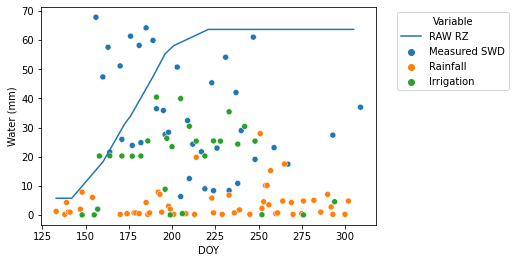

In [54]:
fig, ax = plt.subplots()
treatment = '1'

temp_df1 = plotting_measured_swd[plotting_measured_swd['trtm'] == int(treatment)]
temp_df1 = temp_df1[['Days','Measured SWD']]
temp_df1['Variable'] = 'Measured SWD'
temp_df1.columns = ['DOY','Water (mm)', 'Variable']
temp_df2 = coagmet_rain[['DOY', 'Rain_Tot']].copy()
temp_df2['Variable'] = 'Rainfall'
temp_df2.columns = ['DOY','Water (mm)', 'Variable']
temp_df3 = irrigation_days[irrigation_days[treatment] > 0 ][['DOY', treatment]]
temp_df3['Variable'] = 'Irrigation'
temp_df3.columns = ['DOY','Water (mm)', 'Variable']

full_trtm_df = pd.concat([temp_df1, temp_df2, temp_df3])

ax = sns.scatterplot(y = 'Water (mm)', x = 'DOY', hue = 'Variable', data = full_trtm_df, ax = ax)

raw_rz = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == int(treatment)]
plt.plot(raw_rz['DOY'], raw_rz['RAW RZ'], label = 'RAW RZ')
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels = labels, handles=handles, title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

In [55]:
# Projected SWD 1050
# =IF(proj_swd_1050['DOY' - 1]+tc-eff_precip-eff_irr>0, proj_swd_1050['DOY' - 1]+tc-eff_precip-eff_irr, 0)
# tc = ETr(LIRF)*(Kcb_select*Ks)
# Kcb_select  = Kcb
# Ks = IF(proj_swd_rz['DOY' - 1]>fc_rz*taw_fc*raw_taw,(fc_rz*taw_fc-proj_swd_rz['DOY' - 1])/((1-raw_taw)*fc_rz*taw_fc),1)
# eff_precip = precip -(IF(precip<tew_mm,precip,tew_mm))*(1-canopy_cover-residue_cover+canopy_cover*residue_cover)+
#    IF(precip*precip['DOY' - 1]>0,MAX(precip['DOY' - 1]-eff_precip['DOY' - 1]-etr_lirf+tc,0),0)
# eff_irr =IF(irrigation>0,irrigation-tew_mm*(MIN(1-canopy_cover,MAX(0.1*irrigation^0.5/2-canopy_cover/2+drip_hose_offset_ratio,0)+
#     MAX(0.1*irrigation^0.5/2-canopy_cover/2-drip_hose_offset_ratio,0))*(1-residue_cover)),0)
# drip_hose_offset_ratio = 0.1
# Projected SWD RZ
# =IF(Q6=max_root_zone_depth,proj_swd_1050,(IF(proj_swd_rz['DOY' - 1]+tc-eff_precip-eff_irr>0,proj_swd_rz['DOY' - 1]+
#      tc-eff_precip-eff_irr+(rzd-rzd['DOY' - 1])*(IF(rzd<=150,deficit_at_rz_margin/150,deficit_at_rz_margin/300)),0)))
# max_root_zone_depth = 1050
# deficit_at_rz_margin =IF(rzd<=150, vh20_fc_swd_grouped_multiplied[vh20_fc_swd_grouped_multiplied['Depth' == 15], 
#      IF(AND(rzd['DOY' - 1]<=150,  rzd>150), vh20_fc_swd_grouped_multiplied[vh20_fc_swd_grouped_multiplied['Depth' == 30], 
#      IF(AND(rzd['DOY' - 1]<=450, rzd>450), vh20_fc_swd_grouped_multiplied[vh20_fc_swd_grouped_multiplied['Depth' == 60], 
#      IF(AND(rzd['DOY' - 1]<=750, rzd>750), vh20_fc_swd_grouped_multiplied[vh20_fc_swd_grouped_multiplied['Depth' == 90], 
#      deficit_at_rz_margin['DOY' - 1]))))

In [56]:
tew_mm = 12
residue_cover = 0.2

In [57]:
# reading in ETr(LIRF)
etr_lirf = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/ETr_LIRF.csv', index_col=0)
etr_lirf.columns = pd.to_datetime(etr_lirf.columns)
etr_lirf.columns = [(x - datetime.datetime(etr_lirf.columns[0].year, 1, 1)).days for x in etr_lirf.columns]

# reading in Kcb
Kcb = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/Kcb.csv', index_col=0)
Kcb.columns = pd.to_datetime(Kcb.columns)
Kcb.columns = [(x - datetime.datetime(Kcb.columns[0].year, 1, 1)).days for x in Kcb.columns]
Kcb

,133,134,135,136,137,138,139,140,141,142,...,305,306,307,308,309,310,311,312,313,314
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
2,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
4,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
5,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
6,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
7,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
8,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
9,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12


In [58]:
vh20_fc_swd_grouped_multiplied_90

,trtm,depth,fc,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,2013-06-21 00:00:00,2013-06-26 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,1,15,28.250,26.925000,19.250000,26.268750,4.343750,16.050000,6.787500,26.456250,...,1.337500,17.025000,1.612500,4.275000,20.456250,4.968750,18.300000,2.100000e+00,-0.918750,7.893750
1,1,30,27.625,20.093403,8.828891,11.200415,2.362241,17.501276,4.071825,19.777975,...,1.842804,13.217708,0.738709,11.567800,23.592027,0.586453,1.906632,2.714779e+00,7.126406,9.420560
2,1,60,20.750,10.758061,9.499709,9.979654,6.701995,8.228113,6.162974,7.180190,...,1.990646,6.995891,3.857071,6.979889,9.181591,7.402011,2.007365,7.517844e+00,11.275734,9.826870
3,1,90,22.250,10.026212,9.774921,10.079823,8.195438,9.340105,8.929096,7.916097,...,3.245262,4.783651,4.674431,6.153746,7.754614,6.137701,0.921282,5.137267e+00,9.929732,9.832385
7,2,15,27.250,18.150000,21.656250,24.506250,5.343750,19.368750,9.168750,26.525000,...,5.793750,23.137500,6.431250,22.387500,26.156250,14.756250,16.875000,3.606250e+00,0.056250,2.606250
8,2,30,25.375,20.777517,11.022969,13.884945,3.158416,14.926751,2.863450,18.983225,...,21.993933,29.557137,25.718265,30.244656,35.490587,31.366987,3.443223,4.659736e+00,8.202376,9.687416
9,2,60,24.750,9.339368,8.151536,9.694918,4.992747,5.827314,2.372748,5.921808,...,11.569061,12.472592,13.067208,14.720681,20.664559,20.002758,7.167294,6.348533e+00,11.033761,8.101338
10,2,90,16.250,10.864861,9.603646,9.490883,9.181538,8.230476,7.916263,8.353149,...,7.332015,8.190361,8.594972,9.470586,11.781119,11.481157,10.699437,7.894342e+00,9.043916,7.727993
14,3,15,26.750,21.712500,16.593750,22.687500,2.737500,20.268750,8.381250,26.418750,...,4.243750,18.900000,2.156250,7.800000,19.556250,3.768750,17.625000,1.087500e+00,-1.312500,0.300000
15,3,30,26.000,19.450198,8.240868,10.935901,0.683629,14.379834,1.493353,17.906019,...,3.171591,16.723957,4.610541,12.942863,24.462595,8.113043,-0.113807,1.667447e+00,6.560104,6.501668


In [59]:
vh20_fc_swd_grouped_multiplied_90.head()

,trtm,depth,fc,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,2013-06-21 00:00:00,2013-06-26 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,1,15,28.250,26.925000,19.250000,26.268750,4.343750,16.050000,6.787500,26.456250,...,1.337500,17.025000,1.612500,4.275000,20.456250,4.968750,18.300000,2.100000,-0.918750,7.893750
1,1,30,27.625,20.093403,8.828891,11.200415,2.362241,17.501276,4.071825,19.777975,...,1.842804,13.217708,0.738709,11.567800,23.592027,0.586453,1.906632,2.714779,7.126406,9.420560
2,1,60,20.750,10.758061,9.499709,9.979654,6.701995,8.228113,6.162974,7.180190,...,1.990646,6.995891,3.857071,6.979889,9.181591,7.402011,2.007365,7.517844,11.275734,9.826870
3,1,90,22.250,10.026212,9.774921,10.079823,8.195438,9.340105,8.929096,7.916097,...,3.245262,4.783651,4.674431,6.153746,7.754614,6.137701,0.921282,5.137267,9.929732,9.832385
7,2,15,27.250,18.150000,21.656250,24.506250,5.343750,19.368750,9.168750,26.525000,...,5.793750,23.137500,6.431250,22.387500,26.156250,14.756250,16.875000,3.606250,0.056250,2.606250


In [60]:
swd = vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['trtm'] == int(treatment)]
# swd.columns = [(x - datetime.datetime(2013,1,1)).days if type(x) is datetime.datetime else x for x in swd.columns]

In [61]:
pd.to_datetime(vh20_fc_swd_grouped_multiplied_90.columns[11])

Timestamp('2013-07-01 00:00:00')

In [62]:
# [pd.to_datetime(x) if '00' in x else x for x in vh20_fc_swd_grouped_multiplied_90.columns]

In [63]:
type(vh20_fc_swd_grouped_multiplied_90.columns[11])

datetime.datetime

In [64]:
# vh20_fc_swd_grouped_multiplied_90.columns = [pd.to_datetime(x) if '00' in x else x for x in vh20_fc_swd_grouped_multiplied_90.columns]
vh20_fc_swd_grouped_multiplied_90.columns = [(x - datetime.datetime(vh20_fc_swd_grouped_multiplied_90.columns[11].year, 1, 1)).days if type(x) is datetime.datetime else x for x in vh20_fc_swd_grouped_multiplied_90.columns]

In [65]:
# filling in SWD
days = list(rzd.index)
swd_days = [num for num in vh20_fc_swd_grouped_multiplied_90.columns if isinstance(num, (int,float))]
swd_filled = pd.DataFrame(columns=days)
swd_filled[['trtm','depth']] = vh20_fc_swd_grouped_multiplied_90[['trtm','depth']]
swd_filled[min(days)] = 0
for day in days:
    if day == min(days):
        continue
    elif day in swd_days:
#         print('yes')
        swd_filled[day] = vh20_fc_swd_grouped_multiplied_90[day]
    else:
        swd_filled[day] = swd_filled[day - 1]

In [66]:
swd_days

[156,
 160,
 163,
 164,
 170,
 171,
 176,
 177,
 181,
 182,
 185,
 189,
 191,
 195,
 196,
 198,
 203,
 205,
 209,
 210,
 212,
 217,
 219,
 223,
 224,
 226,
 231,
 233,
 237,
 238,
 240,
 247,
 248,
 259,
 267,
 293,
 309]

In [67]:
print(min(swd_days))
print(max(swd_days))

156
309


In [68]:
rzd

,Root Zone Depth
133,80
134,80
135,80
136,80
137,80
...,...
301,1050
302,1050
303,1050
304,1050


In [69]:
swd

,trtm,depth,fc,2013-06-06 00:00:00,2013-06-10 00:00:00,2013-06-13 00:00:00,2013-06-14 00:00:00,2013-06-20 00:00:00,2013-06-21 00:00:00,2013-06-26 00:00:00,...,2013-08-22 00:00:00,2013-08-26 00:00:00,2013-08-27 00:00:00,2013-08-29 00:00:00,2013-09-05 00:00:00,2013-09-06 00:00:00,2013-09-17 00:00:00,2013-09-25 00:00:00,2013-10-21 00:00:00,2013-11-06 00:00:00
0,1,15,28.250,26.925000,19.250000,26.268750,4.343750,16.050000,6.787500,26.456250,...,1.337500,17.025000,1.612500,4.275000,20.456250,4.968750,18.300000,2.100000,-0.918750,7.893750
1,1,30,27.625,20.093403,8.828891,11.200415,2.362241,17.501276,4.071825,19.777975,...,1.842804,13.217708,0.738709,11.567800,23.592027,0.586453,1.906632,2.714779,7.126406,9.420560
2,1,60,20.750,10.758061,9.499709,9.979654,6.701995,8.228113,6.162974,7.180190,...,1.990646,6.995891,3.857071,6.979889,9.181591,7.402011,2.007365,7.517844,11.275734,9.826870
3,1,90,22.250,10.026212,9.774921,10.079823,8.195438,9.340105,8.929096,7.916097,...,3.245262,4.783651,4.674431,6.153746,7.754614,6.137701,0.921282,5.137267,9.929732,9.832385


In [70]:
swd_filled[swd_filled['trtm'] == int(treatment)][156]

0    26.925000
1    20.093403
2    10.758061
3    10.026212
Name: 156, dtype: float64

In [71]:
def deficit(treatment, depth, day):
    return swd_filled[(swd_filled['trtm'] == int(treatment)) & (swd_filled['depth'] == depth)][day].values[0]

In [72]:
vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['trtm'] == 1][182]

0    2.587500
1    6.994599
2    6.550480
3    8.703398
Name: 182, dtype: float64

In [73]:
swd_filled[swd_filled['trtm'] == 1].loc[:,range(178,188)]

,178,179,180,181,182,183,184,185,186,187
0,4.537500,4.537500,4.537500,17.868750,2.587500,2.587500,2.587500,22.687500,22.687500,22.687500
1,6.830874,6.830874,6.830874,24.230720,6.994599,6.994599,6.994599,24.605613,24.605613,24.605613
2,4.990332,4.990332,4.990332,8.085335,6.550480,6.550480,6.550480,7.872372,7.872372,7.872372
3,7.524482,7.524482,7.524482,7.974758,8.703398,8.703398,8.703398,9.001855,9.001855,9.001855


In [74]:
day = 189
print(rzd.loc[day].values[0])
print(swd_filled[(swd_filled['trtm'] == int(treatment)) & (swd_filled['depth'] == 90)][day].values[0])

760
7.106951587896148


In [75]:
swd_filled.head()

,133,134,135,136,137,138,139,140,141,142,...,298,299,300,301,302,303,304,305,trtm,depth
0,0,0,0,0,0,0,0,0,0,0,...,-0.918750,-0.918750,-0.918750,-0.918750,-0.918750,-0.918750,-0.918750,-0.918750,1,15
1,0,0,0,0,0,0,0,0,0,0,...,7.126406,7.126406,7.126406,7.126406,7.126406,7.126406,7.126406,7.126406,1,30
2,0,0,0,0,0,0,0,0,0,0,...,11.275734,11.275734,11.275734,11.275734,11.275734,11.275734,11.275734,11.275734,1,60
3,0,0,0,0,0,0,0,0,0,0,...,9.929732,9.929732,9.929732,9.929732,9.929732,9.929732,9.929732,9.929732,1,90
7,0,0,0,0,0,0,0,0,0,0,...,0.056250,0.056250,0.056250,0.056250,0.056250,0.056250,0.056250,0.056250,2,15


In [76]:
days = rzd.index
deficit_at_rz_margin_dfs = []
for treatment in treatments:
    deficit_at_rz_margin_list = []
    deficit_at_rz_margin = 0
    root_zone_depth_prev = 0
    swd_prev = 0
    for day in days:
    #     print(day)
        root_zone_depth = rzd.loc[day].values[0]
    #     print(root_zone_depth)
            # Not possible given the 2013 data
        if root_zone_depth <= 150:
            deficit_at_rz_margin = deficit(treatment, 15, day)

        # Not possible given 2013 data
        elif (root_zone_depth_prev <= 150) & (root_zone_depth > 150):
            deficit_at_rz_margin = deficit(treatment, 30, day)
        # Happens at day 173
        elif (root_zone_depth_prev <= 450) & (root_zone_depth > 450):
            deficit_at_rz_margin = deficit(treatment, 60, day)
        # Happens at day 189
        elif (root_zone_depth_prev <= 750) & (root_zone_depth > 750):
            deficit_at_rz_margin = deficit(treatment, 90, day)
        else:
            deficit_at_rz_margin = deficit_at_rz_margin_prev
        deficit_at_rz_margin_list.append(deficit_at_rz_margin)
        root_zone_depth_prev = root_zone_depth
        deficit_at_rz_margin_prev = deficit_at_rz_margin
    deficit_at_rz_margin_df = pd.DataFrame({'Days': days, 'Deficit': deficit_at_rz_margin_list})
    deficit_at_rz_margin_df['Treatment'] = treatment
    deficit_at_rz_margin_dfs.append(deficit_at_rz_margin_df)
deficit_at_rz_margin_all = pd.concat(deficit_at_rz_margin_dfs)
#     print(deficit_at_rz_margin)
# deficit_at_rz_margin =IF(rzd<=150, vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['Depth' == 15], 
#      IF(AND(rzd['DOY' - 1]<=150,  rzd>150), vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['Depth' == 30], 
#      IF(AND(rzd['DOY' - 1]<=450, rzd>450), vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['Depth' == 60], 
#      IF(AND(rzd['DOY' - 1]<=750, rzd>750), vh20_fc_swd_grouped_multiplied_90[vh20_fc_swd_grouped_multiplied_90['Depth' == 90], 
#      deficit_at_rz_margin['DOY' - 1]))))

In [77]:
deficit_at_rz_margin_all

,Days,Deficit,Treatment
0,133,0.000000,1
1,134,0.000000,1
2,135,0.000000,1
3,136,0.000000,1
4,137,0.000000,1
...,...,...,...
168,301,15.367892,12
169,302,15.367892,12
170,303,15.367892,12
171,304,15.367892,12


In [78]:
coagmet_rain.head()

,Rain_Tot,DOY
Date,,
2013-05-14,1.270,133
2013-05-19,0.254,138
2013-05-20,4.318,139
2013-05-21,1.016,140
2013-05-22,1.016,141


In [79]:
133 in coagmet_rain['DOY'].values

True

In [80]:
coagmet_rain[coagmet_rain['DOY'] == 133]['Rain_Tot'].values[0]

1.27

In [81]:
# Filling in rain data with 0's, could use > 0 for plotting to skip this part
coagmet_rain_filled = pd.DataFrame(columns = ['Rain_tot','DOY'])
coagmet_rain_filled['DOY'] = days
coatmet_rain_values = []
for day in days:
    if day in coagmet_rain['DOY'].values:
        coatmet_rain_value = coagmet_rain[coagmet_rain['DOY'] == day]['Rain_Tot'].values[0]
    else:
        coatmet_rain_value = 0
    coatmet_rain_values.append(coatmet_rain_value)
coagmet_rain_filled['Rain_tot'] = coatmet_rain_values

In [82]:
# Need canopy cover
# Reading in from Water balance file
# interpolate later
canopy_cover_df = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/canopy_cover.csv', index_col=0)
for column in canopy_cover_df.columns:
    canopy_cover_df[column] = [float(x.strip('%')) for x in canopy_cover_df[column]]
canopy_cover_df.columns = pd.to_datetime(canopy_cover_df.columns)
canopy_cover_df.columns = [(x - datetime.datetime(canopy_cover_df.columns[0].year, 1, 1)).days for x in canopy_cover_df.columns]
canopy_cover_df = canopy_cover_df/100
canopy_cover_df

,133,134,135,136,137,138,139,140,141,142,...,305,306,307,308,309,310,311,312,313,314
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
initial_proj_swd_df = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/proj_swd_initial.csv', index_col=0)
initial_proj_swd_df

,1,2,3,4,5,6,7,8,9,10,11,12
Treatment,,,,,,,,,,,,
Proj SWD - 1050 mm,48,48,44,47,63,46,42,36,40,57,60,59
Proj SWD - RZ,6,6,6,6,6,6,6,6,6,6,6,6


In [84]:
fc_rz_dfs_all

,Root Zone Depth,FC RZ,RAW RZ,DOY,Treatment
133,80,23.13,5.7825,133,1
134,80,23.13,5.7825,134,1
135,80,23.13,5.7825,135,1
136,80,23.13,5.7825,136,1
137,80,23.13,5.7825,137,1
...,...,...,...,...,...
301,1050,235.80,58.9500,301,12
302,1050,235.80,58.9500,302,12
303,1050,235.80,58.9500,303,12
304,1050,235.80,58.9500,304,12


In [85]:
type(fc_rz_dfs_all['Treatment'].values[0])

numpy.int64

In [86]:
day

305

In [87]:
Kcb_df_all = pd.read_csv('/mnt/c/Users/bo.stevens/OneDrive - USDA/2021/Water balance/Practice project/Water Balance Test Data/Kcb.csv', index_col=0)
Kcb_df_all.columns = pd.to_datetime(Kcb_df_all.columns)
Kcb_df_all.columns = [(x - datetime.datetime(Kcb_df_all.columns[0].year, 1, 1)).days for x in Kcb_df_all.columns]
Kcb_df_all

,133,134,135,136,137,138,139,140,141,142,...,305,306,307,308,309,310,311,312,313,314
Treatment,,,,,,,,,,,,,,,,,,,,,
1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
2,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
4,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
5,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
6,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
7,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
8,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12
9,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12


In [88]:
irrigation_days[irrigation_days['DOY'] == 157]

,11,10,7,5,4,1,2,3,6,8,9,12,DOY
TIMESTAMP,,,,,,,,,,,,,
2013-06-06,2.547771,2.802548,2.038217,2.292994,2.547771,2.038217,2.292994,1.974522,0.0,1.847134,1.847134,1.910828,157


In [89]:
# irrigation_days[irrigation_days['DOY'] == day][]

In [90]:
etr_lirf

,133,134,135,136,137,138,139,140,141,142,...,305,306,307,308,309,310,311,312,313,314
ETr LIRF (mm/d),7.34,7.71,7.22,7.65,8.6,8.1,6.73,5.81,9.73,7.93,...,3.37,1.71,2.29,2.3,3.26,2.74,2.03,2.39,2.13,2.06


In [136]:
final_df_treatments = []
tew_mm = 12
residue_cover = 0.2 # This could be different for each treatment
drip_hose_offset_ratio = 0.1
for treatment in treatments:
    count = 0
    canopy_cover_all = []
    etr_lirf_all = []
    precip_all = []
    eff_precip_all = []
    irrigation_all = []
    precip_prev = 0
    y = 0
    eff_irr = 0
    eff_irr_all = []
    eff_irr_prev = 0
    max_root_zone_depth = 1050
    rzd_now = 80
    rzd_prev = 80
    n = 150
    etc_prev = 1.1
    etc_cumulative = []
    etc_cumulative_all = []
    Ks_all = []
    tc_all = []
    Kcb_all = []
    Kcb_CC_all = []
    Kcb_select_all = []
    proj_swd_rz_all = []
    proj_swd_1050_all = []
    fc_rz_all = []
    for day in days:
#         print('Day ' + str(day))
        etr_lirf_now = etr_lirf[day].values[0]
        etr_lirf_all.append(etr_lirf_now)
        if day == min(days):
            proj_swd_rz = initial_proj_swd_df.loc['Proj SWD - RZ', str(treatment)]
            proj_swd_rz_prev = proj_swd_rz
            proj_swd_1050 = initial_proj_swd_df.loc['Proj SWD - 1050 mm', str(treatment)]
            proj_swd_1050_prev = proj_swd_1050
            Ks = 1
        fc_rz_now = fc_rz_dfs_all[(fc_rz_dfs_all['Treatment'] == int(treatment)) & (fc_rz_dfs_all['DOY'] == day)]['FC RZ'].values[0]
        fc_rz_all.append(fc_rz_now)
#         print('FC RZ = ' + str(fc_rz_now))
#         print('proj_swd_rz_prev = ' + str(proj_swd_rz_prev))
#         print('fc_rz_now * taw_fc * raw_taw = ', str(fc_rz_now * taw_fc * raw_taw))
        if day != min(days):
            if proj_swd_rz_prev > (fc_rz_now * taw_fc * raw_taw):
                Ks = (fc_rz_now * taw_fc - proj_swd_rz_prev)/((1 - raw_taw) * fc_rz_now * taw_fc)
            else:
                Ks = 1
#         print('Ks = ' + str(Ks))
        Ks_all.append(Ks)
        canopy_cover_now = canopy_cover_df.loc[int(treatment),day]
        Kcb = Kcb_df_all.loc[int(treatment), day]
        Kcb_all.append(Kcb)
        a = 0.15
        b = 1.01
        c = 0.96
        CCf = 0.8
        canopy_cover_all.append(canopy_cover_now)
        if canopy_cover_now < CCf:
            Kcb_CC = a+b*canopy_cover_now
        else:
            Kcb_CC = c
        Kcb_CC_all.append(Kcb_CC)
        Kcb_select = Kcb_CC
        Kcb_select_all.append(Kcb_select)
        tc = etr_lirf_now * Kcb_select * Ks
        tc_all.append(tc)
    #     print('etr_lirf_now = ' + str(etr_lirf_now))
    #     print('tc = ' + str(tc))
        precip = coagmet_rain_filled[coagmet_rain_filled['DOY'] == day]['Rain_tot'].values[0]
        
        
#         if treatment == 1:
#             precip = temp_precip.loc[day]['Precip']
            
            
            
            
        precip_all.append(precip)
        if precip < tew_mm:
            x = precip
        else:
            x = tew_mm
        if precip * precip_prev > 0:
            y = max([precip_prev - eff_precip_prev - etr_lirf[day].values[0] + tc, 0])
        else:
            y = 0
        eff_precip = precip - x*(1-canopy_cover_now-residue_cover+residue_cover*canopy_cover_now) + y
        eff_precip_all.append(eff_precip)
        if day in irrigation_days['DOY'].values:
            count += 1
            irrigation_now = irrigation_days[irrigation_days['DOY'] == day][str(treatment)].values[0]
        else:
            irrigation_now = 0
#         #####
        
#         if treatment == 1:
#             irrigation_now = temp_irr.loc[day]['Actual Irrigation']
        
        
        irrigation_all.append(irrigation_now)
        if irrigation_now > 0:
            eff_irr = irrigation_now - tew_mm * (min(1 - canopy_cover_now, 
                                        max([0.1*(irrigation_now**0.5)/2 - canopy_cover_now/2 + drip_hose_offset_ratio, 0]) + 
                                        max([0.1*(irrigation_now**0.5)/2 - canopy_cover_now/2 - drip_hose_offset_ratio, 0]))*(1-residue_cover))
        else:
            eff_irr = 0
        eff_irr_all.append(eff_irr)
        if day != min(days):
            etc = etc_prev + tc + (precip - eff_precip) + (irrigation_now - eff_irr)
            if proj_swd_1050_prev + tc - eff_precip - eff_irr > 0:
                proj_swd_1050 = proj_swd_1050_prev + tc - eff_precip - eff_irr
            else:
                proj_swd_1050 = 0
            rzd_now = rzd.loc[day].values[0]
            if rzd_now == max_root_zone_depth:
                proj_swd_rz = proj_swd_1050
            elif proj_swd_rz_prev + tc - eff_precip - eff_irr > 0:
                if rzd_now <= 150:
                    n = 150
                else:
                    n = 300
                deficit_at_rz_margin = deficit_at_rz_margin_all[(deficit_at_rz_margin_all['Days'] == day) & 
                                                               (deficit_at_rz_margin_all['Treatment'] == treatment)]['Deficit'].values[0]
                proj_swd_rz = proj_swd_rz_prev + tc - eff_precip - eff_irr + (rzd_now - rzd_prev)*deficit_at_rz_margin/n
            else:
                proj_swd_rz = 0
        else:
            etc = tc
        etc_cumulative_all.append(etc)
#         print('proj_swd_rz_prev = ' + str(proj_swd_rz_prev))
        proj_swd_rz_all.append(proj_swd_rz)
        proj_swd_1050_all.append(proj_swd_1050)
        rzd_prev = rzd_now
        precip_prev = precip
        eff_precip_prev = eff_precip
        etc_prev = etc
        proj_swd_rz_prev = proj_swd_rz
        proj_swd_1050_prev = proj_swd_1050
    final_df_treatment = pd.DataFrame({'Root Zone Depth':rzd['Root Zone Depth'], 'Canopy Cover':canopy_cover_all,
                            'Kcb_table':Kcb_all, 'Kcb CC':Kcb_CC_all, 'Kcb_select':Kcb_select_all,
                            'Ks':Ks_all, 'ETr_LIRF':etr_lirf_all, 'Tc':tc_all, 'Precip':precip_all,
                            'Eff precip': eff_precip_all, 'Proj SWD 1050':proj_swd_1050_all,
                            'Proj SWD RZ': proj_swd_rz_all, 'FC RZ': fc_rz_all, 'Irrigation':irrigation_all, 
                                       'Eff irrigation':eff_irr_all,'ET': etc_cumulative_all,'DOY':days})
    final_df_treatment['Treatment'] = treatment
    final_df_treatment['Ks_100'] = final_df_treatment['Ks']*100
    final_df_treatments.append(final_df_treatment)
final_df = pd.concat(final_df_treatments)

In [92]:
# pd.DataFrame(final_df[final_df['Treatment'] == int(treatment)]['Precip']).transpose().to_csv('../Water Balance Test Data/coagmet_precip_Bo.csv')
# pd.DataFrame(final_df[final_df['Treatment'] == 1]['Irrigation']).transpose().to_csv('../Water Balance Test Data/irrigation_Bo.csv')

In [140]:
# Eff precip is right
# 
final_df.iloc[-11:]

,Root Zone Depth,Canopy Cover,Kcb_table,Kcb CC,Kcb_select,Ks,ETr_LIRF,Tc,Precip,Eff precip,Proj SWD 1050,Proj SWD RZ,FC RZ,Irrigation,Eff irrigation,ET,DOY,Treatment,Ks_100
295,1050,0.0,0.13,0.15,0.15,1.000000,3.02,0.453000,0.000,0.0000,57.291484,57.291484,235.8,0.0,0.0,498.549108,295,12,100.000000
296,1050,0.0,0.13,0.15,0.15,1.000000,2.67,0.400500,0.000,0.0000,57.691984,57.691984,235.8,0.0,0.0,498.949608,296,12,100.000000
297,1050,0.0,0.12,0.15,0.15,1.000000,1.54,0.231000,0.000,0.0000,57.922984,57.922984,235.8,0.0,0.0,499.180608,297,12,100.000000
298,1050,0.0,0.12,0.15,0.15,1.000000,2.34,0.351000,0.000,0.0000,58.273984,58.273984,235.8,0.0,0.0,499.531608,298,12,100.000000
299,1050,0.0,0.12,0.15,0.15,1.000000,2.52,0.378000,0.000,0.0000,58.651984,58.651984,235.8,0.0,0.0,499.909608,299,12,100.000000
300,1050,0.0,0.12,0.15,0.15,1.000000,2.77,0.415500,0.254,0.0508,59.016684,59.016684,235.8,0.0,0.0,500.528308,300,12,100.000000
301,1050,0.0,0.12,0.15,0.15,0.998869,0.23,0.034461,0.000,0.0000,59.051145,59.051145,235.8,0.0,0.0,500.562769,301,12,99.886880
302,1050,0.0,0.12,0.15,0.15,0.998284,0.44,0.065887,4.826,0.9652,58.151832,58.151832,235.8,0.0,0.0,504.489456,302,12,99.828422
303,1050,0.0,0.12,0.15,0.15,1.000000,0.86,0.129000,0.000,0.0000,58.280832,58.280832,235.8,0.0,0.0,504.618456,303,12,100.000000
304,1050,0.0,0.12,0.15,0.15,1.000000,2.06,0.309000,0.000,0.0000,58.589832,58.589832,235.8,0.0,0.0,504.927456,304,12,100.000000


In [94]:
final_df[final_df['Treatment'] == 1].iloc[(len(days) - 15):]

,Root Zone Depth,Canopy Cover,Kcb_table,Kcb CC,Kcb_select,Ks,ETr_LIRF,Tc,Precip,Eff precip,Proj SWD 1050,Proj SWD RZ,FC RZ,Irrigation,Eff irrigation,Treatment,Ks_100
291,1050,0.0,0.14,0.15,0.15,1.0,1.78,0.2670,0.000,0.0000,18.514213,18.514213,254.55,0.000000,0.000000,1,100.0
292,1050,0.0,0.14,0.15,0.15,1.0,2.29,0.3435,2.794,0.5588,18.298913,18.298913,254.55,0.000000,0.000000,1,100.0
293,1050,0.0,0.14,0.15,0.15,1.0,0.74,0.1110,0.254,1.6570,16.752913,16.752913,254.55,0.000000,0.000000,1,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.4830,0.000,0.0000,14.705758,14.705758,254.55,4.585987,2.530155,1,100.0
295,1050,0.0,0.13,0.15,0.15,1.0,3.02,0.4530,0.000,0.0000,15.158758,15.158758,254.55,0.000000,0.000000,1,100.0
296,1050,0.0,0.13,0.15,0.15,1.0,2.67,0.4005,0.000,0.0000,15.559258,15.559258,254.55,0.000000,0.000000,1,100.0
297,1050,0.0,0.12,0.15,0.15,1.0,1.54,0.2310,0.000,0.0000,15.790258,15.790258,254.55,0.000000,0.000000,1,100.0
298,1050,0.0,0.12,0.15,0.15,1.0,2.34,0.3510,0.000,0.0000,16.141258,16.141258,254.55,0.000000,0.000000,1,100.0
299,1050,0.0,0.12,0.15,0.15,1.0,2.52,0.3780,0.000,0.0000,16.519258,16.519258,254.55,0.000000,0.000000,1,100.0
300,1050,0.0,0.12,0.15,0.15,1.0,2.77,0.4155,0.254,0.0508,16.883958,16.883958,254.55,0.000000,0.000000,1,100.0


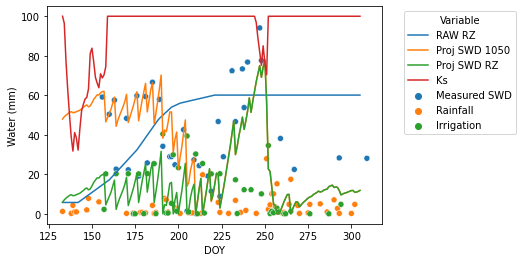

In [95]:
fig, ax = plt.subplots()
treatment = '2'

temp_df1 = plotting_measured_swd[plotting_measured_swd['trtm'] == int(treatment)]
temp_df1 = temp_df1[['Days','Measured SWD']]
temp_df1['Variable'] = 'Measured SWD'
temp_df1.columns = ['DOY','Water (mm)', 'Variable']
temp_df2 = coagmet_rain[['DOY', 'Rain_Tot']].copy()
temp_df2['Variable'] = 'Rainfall'
temp_df2.columns = ['DOY','Water (mm)', 'Variable']
temp_df3 = irrigation_days[irrigation_days[treatment] > 0 ][['DOY', treatment]]
temp_df3['Variable'] = 'Irrigation'
temp_df3.columns = ['DOY','Water (mm)', 'Variable']

full_trtm_df = pd.concat([temp_df1, temp_df2, temp_df3])

ax = sns.scatterplot(y = 'Water (mm)', x = 'DOY', hue = 'Variable', data = full_trtm_df, ax = ax)

raw_rz = fc_rz_dfs_all[fc_rz_dfs_all['Treatment'] == int(treatment)]
plt.plot(raw_rz['DOY'], raw_rz['RAW RZ'], label = 'RAW RZ')

treatment_df = final_df[final_df['Treatment'] == int(treatment)]
plt.plot(treatment_df.index, treatment_df['Proj SWD 1050'], label = 'Proj SWD 1050')
plt.plot(treatment_df.index, treatment_df['Proj SWD RZ'], label = 'Proj SWD RZ')
plt.plot(treatment_df.index, treatment_df['Ks_100'], label = 'Ks')

handles, labels = ax.get_legend_handles_labels()
ax.legend(labels = labels, handles=handles, title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')

In [96]:
temp_proj_swd_rz = pd.DataFrame(waterbalancecorn13_C1.loc['Proj SWD - RZ'][1:])
temp_proj_swd_rz = temp_proj_swd_rz[temp_proj_swd_rz['Proj SWD - RZ'] > 0]
temp_proj_swd_rz.index = pd.to_datetime(temp_proj_swd_rz.index)
temp_proj_swd_rz.index = [(x - datetime.datetime(temp_proj_swd_rz.index[0].year, 1, 1)).days for x in temp_proj_swd_rz.index]
temp_proj_swd_rz['Python'] = final_df[final_df['Treatment'] == 1]['Proj SWD RZ']
# temp_proj_swd_1050['Days'] = temp_proj_swd_1050.in
temp_proj_swd_rz

,Proj SWD - RZ,Python
133,6,6.000000
134,7.10859,7.113000
135,7.93773,7.946812
136,8.65151,8.664818
137,9.29354,9.311811
...,...,...
301,19.1615,16.918458
302,18.2621,16.019258
303,18.3911,16.148258
304,18.6995,16.457258


<AxesSubplot:xlabel='Days', ylabel='value'>

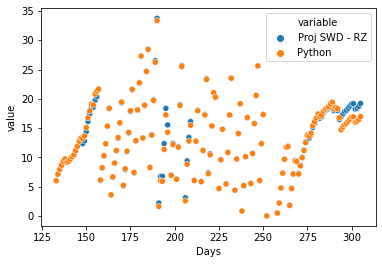

In [97]:
temp_df_plotting_rz = pd.melt(temp_proj_swd_rz, ignore_index=False)
temp_df_plotting_rz['Days'] = temp_df_plotting_rz.index
sns.scatterplot(x = 'Days', y = 'value', hue = 'variable', data = temp_df_plotting_rz)

In [98]:
temp_proj_swd_1050 = pd.DataFrame(waterbalancecorn13_C1.loc['Proj SWD - 1050 mm'][1:])
temp_proj_swd_1050 = temp_proj_swd_1050[temp_proj_swd_1050['Proj SWD - 1050 mm'] > 0]
temp_proj_swd_1050.index = pd.to_datetime(temp_proj_swd_1050.index)
temp_proj_swd_1050.index = [(x - datetime.datetime(temp_proj_swd_1050.index[0].year, 1, 1)).days for x in temp_proj_swd_1050.index]
temp_proj_swd_1050['Python'] = final_df[final_df['Treatment'] == 1]['Proj SWD 1050']
# temp_proj_swd_1050['Days'] = temp_proj_swd_1050.in
# temp_proj_swd_1050.to_csv('../Water Balance Test Data/temp_proj_swd_1050.csv')
temp_proj_swd_1050

,Proj SWD - 1050 mm,Python
133,48,48.000000
134,49.1086,49.113000
135,49.9377,49.946812
136,50.6515,50.664818
137,51.2935,51.311811
...,...,...
301,19.1615,16.918458
302,18.2621,16.019258
303,18.3911,16.148258
304,18.6995,16.457258


<AxesSubplot:xlabel='Days', ylabel='value'>

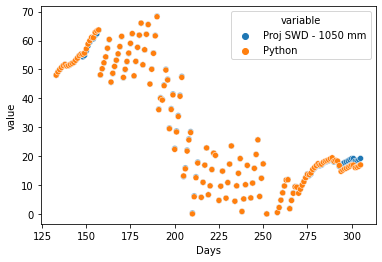

In [99]:
temp_df_plotting = pd.melt(temp_proj_swd_1050, ignore_index=False)
temp_df_plotting['Days'] = temp_df_plotting.index
sns.scatterplot(x = 'Days', y = 'value', hue = 'variable', data = temp_df_plotting)

In [100]:
temp_irr = pd.DataFrame(waterbalancecorn13_C1.loc['Actual Irrigation'][1:])
temp_irr = temp_irr[temp_irr['Actual Irrigation'] >= 0]
temp_irr.index = pd.to_datetime(temp_irr.index)
temp_irr.index = [(x - datetime.datetime(temp_irr.index[0].year, 1, 1)).days for x in temp_irr.index]
temp_irr['Python'] = final_df[final_df['Treatment'] == 1]['Irrigation']
temp_irr

,Actual Irrigation,Python
133,0,0.0
134,0,0.0
135,0,0.0
136,0,0.0
137,0,0.0
...,...,...
301,0,0.0
302,0,0.0
303,0,0.0
304,0,0.0


In [101]:
temp_irr.tail(n = 50)

,Actual Irrigation,Python
256,0,0.000000
257,0,0.000000
258,0,0.000000
259,0,0.000000
260,0,0.000000
261,0,0.000000
262,0,0.000000
263,0,0.000000
264,0,0.000000
265,0,0.000000


<AxesSubplot:xlabel='Days', ylabel='value'>

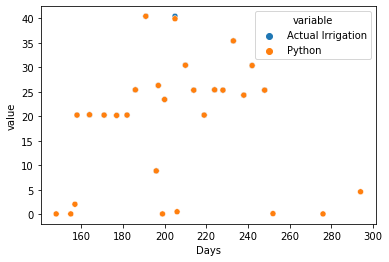

In [102]:
temp_df_plotting_irr = pd.melt(temp_irr, ignore_index=False)
temp_df_plotting_irr['Days'] = temp_df_plotting_irr.index
sns.scatterplot(x = 'Days', y = 'value', hue = 'variable', data = temp_df_plotting_irr[temp_df_plotting_irr['value'] > 0])

In [103]:
temp_precip = pd.DataFrame(waterbalancecorn13_C1.loc['Precip'][1:])
temp_precip = temp_precip[temp_precip['Precip'] >= 0]
temp_precip = temp_precip.iloc[0:len(temp_irr)]
temp_precip.index = pd.to_datetime(temp_precip.index)
temp_precip.index = [(x - datetime.datetime(temp_precip.index[0].year, 1, 1)).days for x in temp_precip.index]
temp_precip['Python'] = final_df[final_df['Treatment'] == 1]['Precip']
temp_precip

,Precip,Python
133,1.27,1.270
134,0,0.000
135,0,0.000
136,0,0.000
137,0,0.000
...,...,...
301,0,0.000
302,4.826,4.826
303,0,0.000
304,0,0.000


<AxesSubplot:xlabel='Days', ylabel='value'>

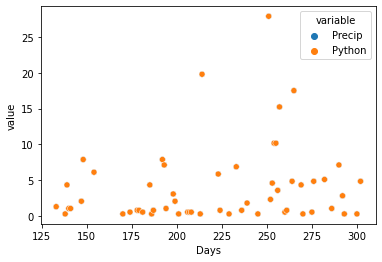

In [104]:
temp_df_plotting_precip = pd.melt(temp_precip, ignore_index=False)
temp_df_plotting_precip['Days'] = temp_df_plotting_precip.index
sns.scatterplot(x = 'Days', y = 'value', hue = 'variable', data = temp_df_plotting_precip[temp_df_plotting_precip['value'] > 0])

In [105]:
temp_tc = pd.DataFrame(waterbalancecorn13_C1.loc['Tc (Kcb Select)'][1:])
temp_tc = temp_tc[temp_tc['Tc (Kcb Select)'] >= 0]
temp_tc.index = pd.to_datetime(temp_tc.index)
temp_tc.index = [(x - datetime.datetime(temp_tc.index[0].year, 1, 1)).days for x in temp_tc.index]
temp_tc['Python'] = final_df[final_df['Treatment'] == 1]['Tc']
temp_tc

,Tc (Kcb Select),Python
133,1.10154,1.101000
134,1.10859,1.113000
135,0.829143,0.833812
136,0.713773,0.718006
137,0.642031,0.646993
...,...,...
301,0.0342507,0.034500
302,0.0658426,0.066000
303,0.128977,0.129000
304,0.308426,0.309000


<AxesSubplot:xlabel='Days', ylabel='value'>

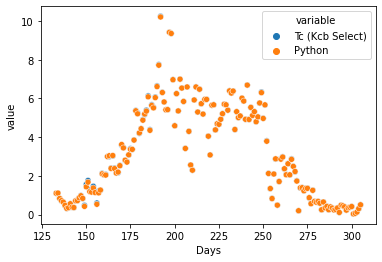

In [106]:
temp_df_plotting_tc = pd.melt(temp_tc, ignore_index=False)
temp_df_plotting_tc['Days'] = temp_df_plotting_tc.index
sns.scatterplot(x = 'Days', y = 'value', hue = 'variable', data = temp_df_plotting_tc)

In [107]:
temp_tc.loc[199]

Tc (Kcb Select)    6.97401
Python              6.9696
Name: 199, dtype: object

In [108]:
final_df.loc[147]

,Root Zone Depth,Canopy Cover,Kcb_table,Kcb CC,Kcb_select,Ks,ETr_LIRF,Tc,Precip,Eff precip,Proj SWD 1050,Proj SWD RZ,FC RZ,Irrigation,Eff irrigation,Treatment,Ks_100
147,130,0.02,0.15,0.1702,0.1702,0.619273,9.22,0.971790,2.032,0.438912,55.280443,13.280443,36.93,0.0,0.0,1,61.927263
147,130,0.02,0.15,0.1702,0.1702,0.589249,9.22,0.924675,2.032,0.438912,55.136676,13.136676,35.87,0.0,0.0,2,58.924861
147,130,0.02,0.15,0.1702,0.1702,0.598277,9.22,0.938843,2.032,0.438912,50.765004,12.765004,35.00,0.0,0.0,3,59.827743
147,130,0.02,0.15,0.1702,0.1702,0.624849,9.22,0.980540,2.032,0.438912,53.804541,12.804541,35.67,0.0,0.0,4,62.484859
147,130,0.02,0.15,0.1702,0.1702,0.604884,9.22,0.949210,2.032,0.438912,69.532713,12.532713,34.47,0.0,0.0,5,60.488374
147,130,0.02,0.15,0.1702,0.1702,0.578575,9.22,0.907926,2.032,0.438912,53.432409,13.432409,36.48,0.0,0.0,6,57.857510
147,130,0.03,0.15,0.1803,0.1803,0.604211,9.22,1.004421,2.032,0.455168,48.734487,12.734487,34.92,0.0,0.0,7,60.421146
147,130,0.02,0.15,0.1702,0.1702,0.567951,9.22,0.891253,2.032,0.438912,42.757225,12.757225,34.37,0.0,0.0,8,56.795063
147,130,0.02,0.15,0.1702,0.1702,0.553312,9.22,0.868281,2.032,0.438912,46.878121,12.878121,34.42,0.0,0.0,9,55.331182
147,130,0.02,0.15,0.1702,0.1702,0.609768,9.22,0.956875,2.032,0.438912,64.506205,13.506205,37.37,0.0,0.0,10,60.976799


In [109]:
final_df.loc[294]

,Root Zone Depth,Canopy Cover,Kcb_table,Kcb CC,Kcb_select,Ks,ETr_LIRF,Tc,Precip,Eff precip,Proj SWD 1050,Proj SWD RZ,FC RZ,Irrigation,Eff irrigation,Treatment,Ks_100
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,14.705758,14.705758,254.55,4.585987,2.530155,1,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,9.631202,9.631202,240.45,4.840764,2.728598,2,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,23.868403,23.868403,251.40,4.267516,2.284351,3,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,37.450052,37.450052,244.65,4.713376,2.629186,4,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,52.690150,52.690150,249.75,4.012739,2.089684,5,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,52.194161,52.194161,220.50,3.821656,1.923301,6,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,27.524913,27.524913,249.00,0.000000,0.000000,7,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,30.372986,30.372986,211.95,3.757962,1.867460,8,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,42.421744,42.421744,223.20,3.694268,1.811685,9,100.0
294,1050,0.0,0.13,0.15,0.15,1.0,3.22,0.483,0.0,0.0,59.595593,59.595593,240.45,0.000000,0.000000,10,100.0


In [110]:
temp_proj_swd_1050_percent = temp_proj_swd_1050.copy()
temp_proj_swd_1050_percent['Percent difference'] = (temp_proj_swd_1050_percent['Python'] - temp_proj_swd_1050_percent['Proj SWD - 1050 mm'])/temp_proj_swd_1050_percent['Proj SWD - 1050 mm']*100

In [111]:
temp_proj_swd_1050_percent.tail(n = 50)

,Proj SWD - 1050 mm,Python,Percent difference
250,17.3473,17.304322,-0.247559
252,0.00636852,0.000000,-100
258,0.486906,0.486780,-0.0258728
259,2.19522,2.195036,-0.00833715
260,4.78355,4.757656,-0.541222
261,7.32926,7.292316,-0.50402
262,9.69424,9.661956,-0.333037
263,11.7696,11.717592,-0.442251
264,11.8901,11.834032,-0.471412
265,1.87983,1.793552,-4.58949


In [112]:
temp_irr.loc[157]

Actual Irrigation          0
Python               2.03822
Name: 157, dtype: object

In [113]:
irrigation_days[irrigation_days['DOY'] == 155]

,11,10,7,5,4,1,2,3,6,8,9,12,DOY
TIMESTAMP,,,,,,,,,,,,,
2013-06-04,0.0,0.0,0.0,0.0,0.0,0.063694,0.0,0.0,0.0,0.0,0.0,0.0,155
